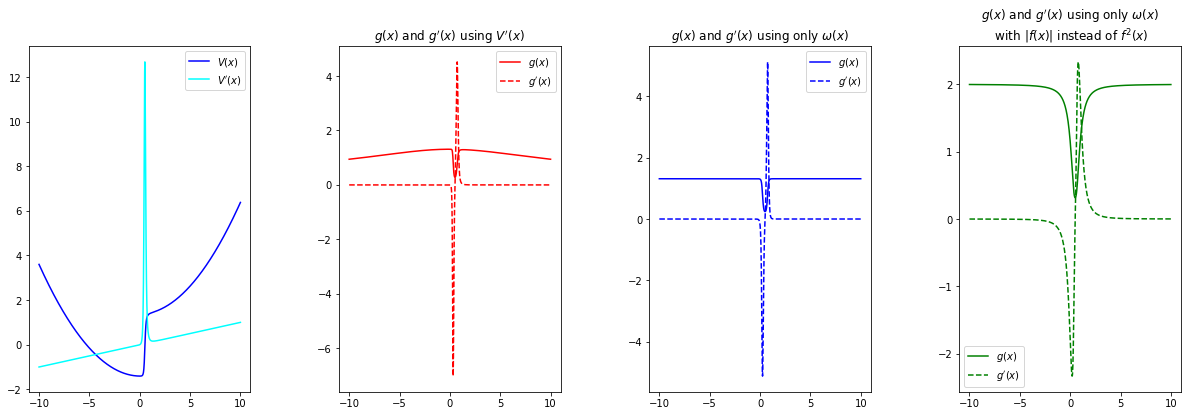

In [2]:
b=0.1
a=5
x0=.5
c=0.1
m=0.9
M=5
m3=0.1
M3=2
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np 

def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

def omega(x):
    wx =b/(b/a+(x-x0)**2)
    return wx

def Up(x):
    wx =b/(b/a+(x-x0)**2)
    res = (wx*wx+c)*x
    return res


def getg1(x): 
    wx =b/(b/a+(x-x0)**2)
    f = (wx*wx+c)*x
    xi = f*f + m*m
    g = 1/M+1/np.sqrt(xi)
    return g

def getgprime1(x):
    wx =b/(b/a+(x-x0)**2)
    f = (wx*wx+c)*x
    fp = (a*a*b*b*(a*(-3*x*x+2*x0*x+x0*x0)+b))/np.power((a*(x-x0)*(x-x0)+b),3)
    gprime= -f*fp/np.power((f*f+m*m),1.5)
    return gprime
    
def getg2(x): 
    wx =b/(b/a+(x-x0)**2)
    f = wx*wx
    xi = f*f + m*m
    g = (1/M+1/np.sqrt(xi))
    return g

def getgprime2(x):
    wx =b/(b/a+(x-x0)**2)
    f = wx*wx
    fp = -4*b*b*(x-x0)/np.power((b/a+(x-x0)*(x-x0)),3)
    gprime= -f*fp/np.power((f*f+m*m),1.5)
    return gprime

def getg3(x): 
    wx =(b/a+(x-x0)**2)/b
    f = wx*wx
    xi = f+m3
    g = 1/(1/M3+1/np.sqrt(xi))
    return g
    
def getgprime3(x):
    wx =(b/a+(x-x0)**2)/b
    f = wx*wx
    fp = 4*(x-x0)*((b/a)+(x-x0)**2)/b**2
    xi=np.sqrt(f+m3)
    gprime= M3**2*fp/(2*xi*(xi+M3)**2)
    return gprime

fig, (axs)= plt.subplots(1, 4,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
s=np.linspace(-10,10,1000)
axs[0].plot(s,U(s),label="$V(x)$",color="blue")
axs[0].plot(s,Up(s),label="$V'(x)$",color="cyan")
# axs[0].set_title("$g(x)$ and $g'(x)$ using $V'(x)$")
axs[0].legend()

axs[1].plot(s,getg1(s),color="red",label="$g(x)$")
axs[1].plot(s,getgprime1(s),"--",color="red",label="$g'(x)$")
axs[1].set_title("$g(x)$ and $g'(x)$ using $V'(x)$")
axs[1].legend()

axs[2].plot(s,getg2(s),color="blue",label="$g(x)$")
axs[2].plot(s,getgprime2(s),"--",color="blue",label="$g'(x)$")
axs[2].set_title("$g(x)$ and $g'(x)$ using only $\\omega(x)$")
axs[2].legend()

axs[3].plot(s,getg3(s),color="green",label="$g(x)$")
axs[3].plot(s,getgprime3(s),"--",color="green",label="$g'(x)$")
axs[3].set_title("$g(x)$ and $g'(x)$ using only $\\omega(x)$\n with $|f(x)|$ instead of $f^2(x)$")
axs[3].legend()


## Poster Plots
### 2. Motivating Example

Text(0.5, 0, '$x$')

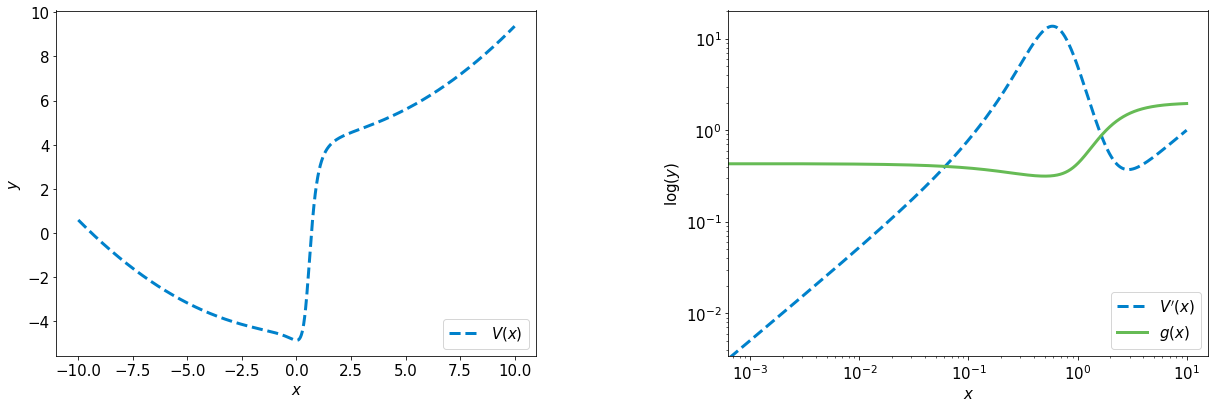

In [6]:
### Plot parameters: 
font_size = 15
line_w=3
b=1
a=5
x0=0.5
c=0.1

# myblue = "#0077BB"
# mycyan = "#33BBEE"
# mygreen = "#009988"
# myorange="#EE7733"
# myred="#CC3311"
# mymagenta="#EE3377"
# mygrey="#BBBBBB"

# myblue = "#4477AA"
# mycyan = "#66CCEE"
# mygreen = "#228833"
# myorange="#CCBB44"
# myred="#EE6677"
# mymagenta="#AA3377"
# mygrey="#BBBBBB"

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"


plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

########################################


fig, (axs)= plt.subplots(1, 2,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
s=np.linspace(-10,10,10000)
axs[0].plot(s,U(s),"--",label="$V(x)$",linewidth=line_w,color=myblue)
axs[0].plot(s,omega(s),label="$\\omega(x)$",linewidth=line_w,color=mygreen)
axs[0].plot(s[np.argmax(omega(s))],np.max(omega(s)),"x",markersize=3,color="black")
axs[0].annotate('($x_0$,$a$)', xy=(s[np.argmax(omega(s))],np.max(omega(s))),fontsize=font_size, textcoords='data',xytext=(-3,a+0.8)) # <--
axs[0].legend(loc = "lower right",fontsize=font_size)
axs[0].set_ylabel("$y$",fontsize=font_size)
axs[0].set_xlabel("$x$",fontsize=font_size)


axs[1].loglog(s,Up(s),"--",label="$V'(x)$",linewidth=line_w,color=myblue)
axs[1].loglog(s,getg3(s),color=mygreen,linewidth=line_w,label="$g(x)$")
axs[1].legend(loc = "lower right",fontsize=font_size)
axs[1].set_ylabel("$\\log(y)$",fontsize=font_size)
axs[1].set_xlabel("$x$",fontsize=font_size)


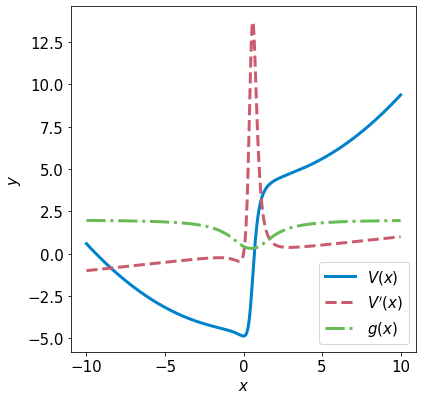

In [19]:
fig, (ax)= plt.subplots(1, 1,figsize=(6,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
s=np.linspace(-10,10,10000)
ax.plot(s,U(s),label="$V(x)$",linewidth=line_w,color=myblue)
# axs[0].plot(s,omega(s),label="$\\omega(x)$",linewidth=line_w,color=mygreen)
# ax.plot(s[np.argmax(omega(s))],np.max(omega(s)),"x",markersize=3,color="black")
# ax.annotate('($x_0$,$a$)', xy=(s[np.argmax(omega(s))],np.max(omega(s))),fontsize=font_size, textcoords='data',xytext=(-3,a+0.8)) # <--
ax.set_ylabel("$y$",fontsize=font_size)
ax.set_xlabel("$x$",fontsize=font_size)
ax.plot(s,Up(s),"--",label="$V'(x)$",linewidth=line_w,color=myred)
ax.plot(s,getg3(s),"-.",color=mygreen,linewidth=line_w,label="$g(x)$")
ax.legend(loc = "lower right",fontsize=font_size)

# axs[1].loglog(s,Up(s),"--",label="$V'(x)$",linewidth=line_w,color=myblue)
# axs[1].loglog(s,getg3(s),color=mygreen,linewidth=line_w,label="$g(x)$")
# axs[1].legend(loc = "lower right",fontsize=font_size)
# axs[1].set_ylabel("$\\log(y)$",fontsize=font_size)
# axs[1].set_xlabel("$x$",fontsize=font_size)

### 3. Histograms Invariant distrbution + SDE + naive time rescaled
see file plot_hist_part2and3poster.py


(-4.0, 4.0)

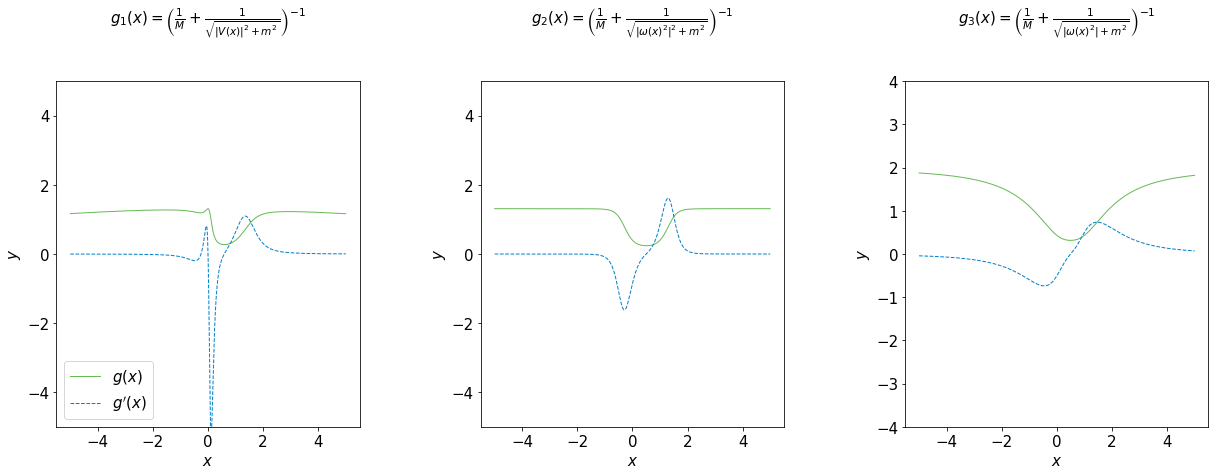

In [13]:
## Different design of function g(x)

plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
yt=1.15

fig, (axs)= plt.subplots(1, 3,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
s=np.linspace(-5,5,1000)
axs[0].plot(s,getg1(s),label="$g(x)$",linewidth=line_w,color=mygreen)
axs[0].plot(s,getgprime1(s),"--",label="$g'(x)$",linewidth=line_w,color=myblue)
axs[0].legend(loc = "lower left",fontsize=font_size)
axs[0].set_title("$g_1(x)=\\left(\\frac{1}{M}+\\frac{1}{\sqrt{|V(x)|^2+m^2}}\\right)^{-1}$",y=yt,fontsize=font_size)
axs[0].set_ylabel("$y$",fontsize=font_size)
axs[0].set_xlabel("$x$",fontsize=font_size)
axs[0].set_ylim(-5,5)


axs[1].plot(s,getg2(s),label="$g_2(x)$",linewidth=line_w,color=mygreen)
axs[1].plot(s,getgprime2(s),"--",label="$g_2'(x)$",linewidth=line_w,color=myblue)
axs[1].set_title("$g_2(x)=\\left(\\frac{1}{M}+\\frac{1}{\sqrt{|\\omega(x)^2|^2+m^2}}\\right)^{-1}$",y=yt,fontsize=font_size)
axs[1].set_ylabel("$y$",fontsize=font_size)
axs[1].set_xlabel("$x$",fontsize=font_size)
axs[1].set_ylim(-5,5)

axs[2].plot(s,getg3(s),label="$g_3(x)$",linewidth=line_w,color=mygreen)
axs[2].plot(s,getgprime3(s),"--",label="$g_3'(x)$",linewidth=line_w,color=myblue)
axs[2].set_title("$g_3(x)=\\left(\\frac{1}{M}+\\frac{1}{\sqrt{|\\omega(x)^2|+m^2}}\\right)^{-1}$",y=yt,fontsize=font_size)
axs[2].set_ylabel("$y$",fontsize=font_size)
axs[2].set_xlabel("$x$",fontsize=font_size)
axs[2].set_ylim(-4,4)


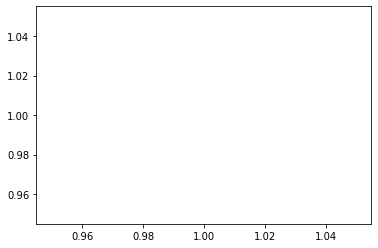

In [9]:
import matplotlib.colors as cl

myblue = (0/235,119/235,187/235)
plt.plot(1,1,"-",color=myblue)